# Customer Churn Prediction using Logistic Regression

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
df = pd.read_csv('class_ds.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

- data types and counts of each column
- concise summaries of the data
- detecting null values

In [41]:
df.describe()
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- filling in null values with the median of that column

In [42]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- distribution of target variable

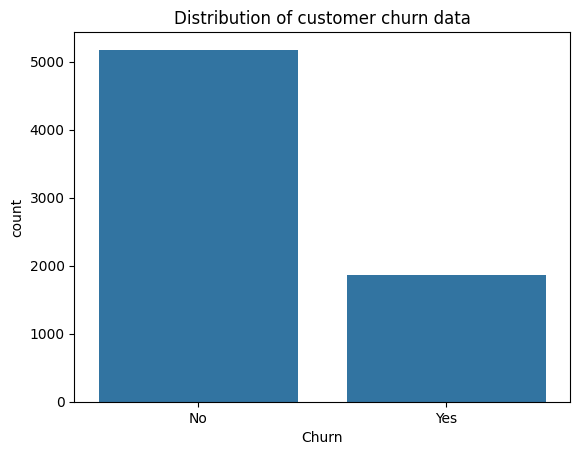

In [43]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of customer churn data')
plt.show()

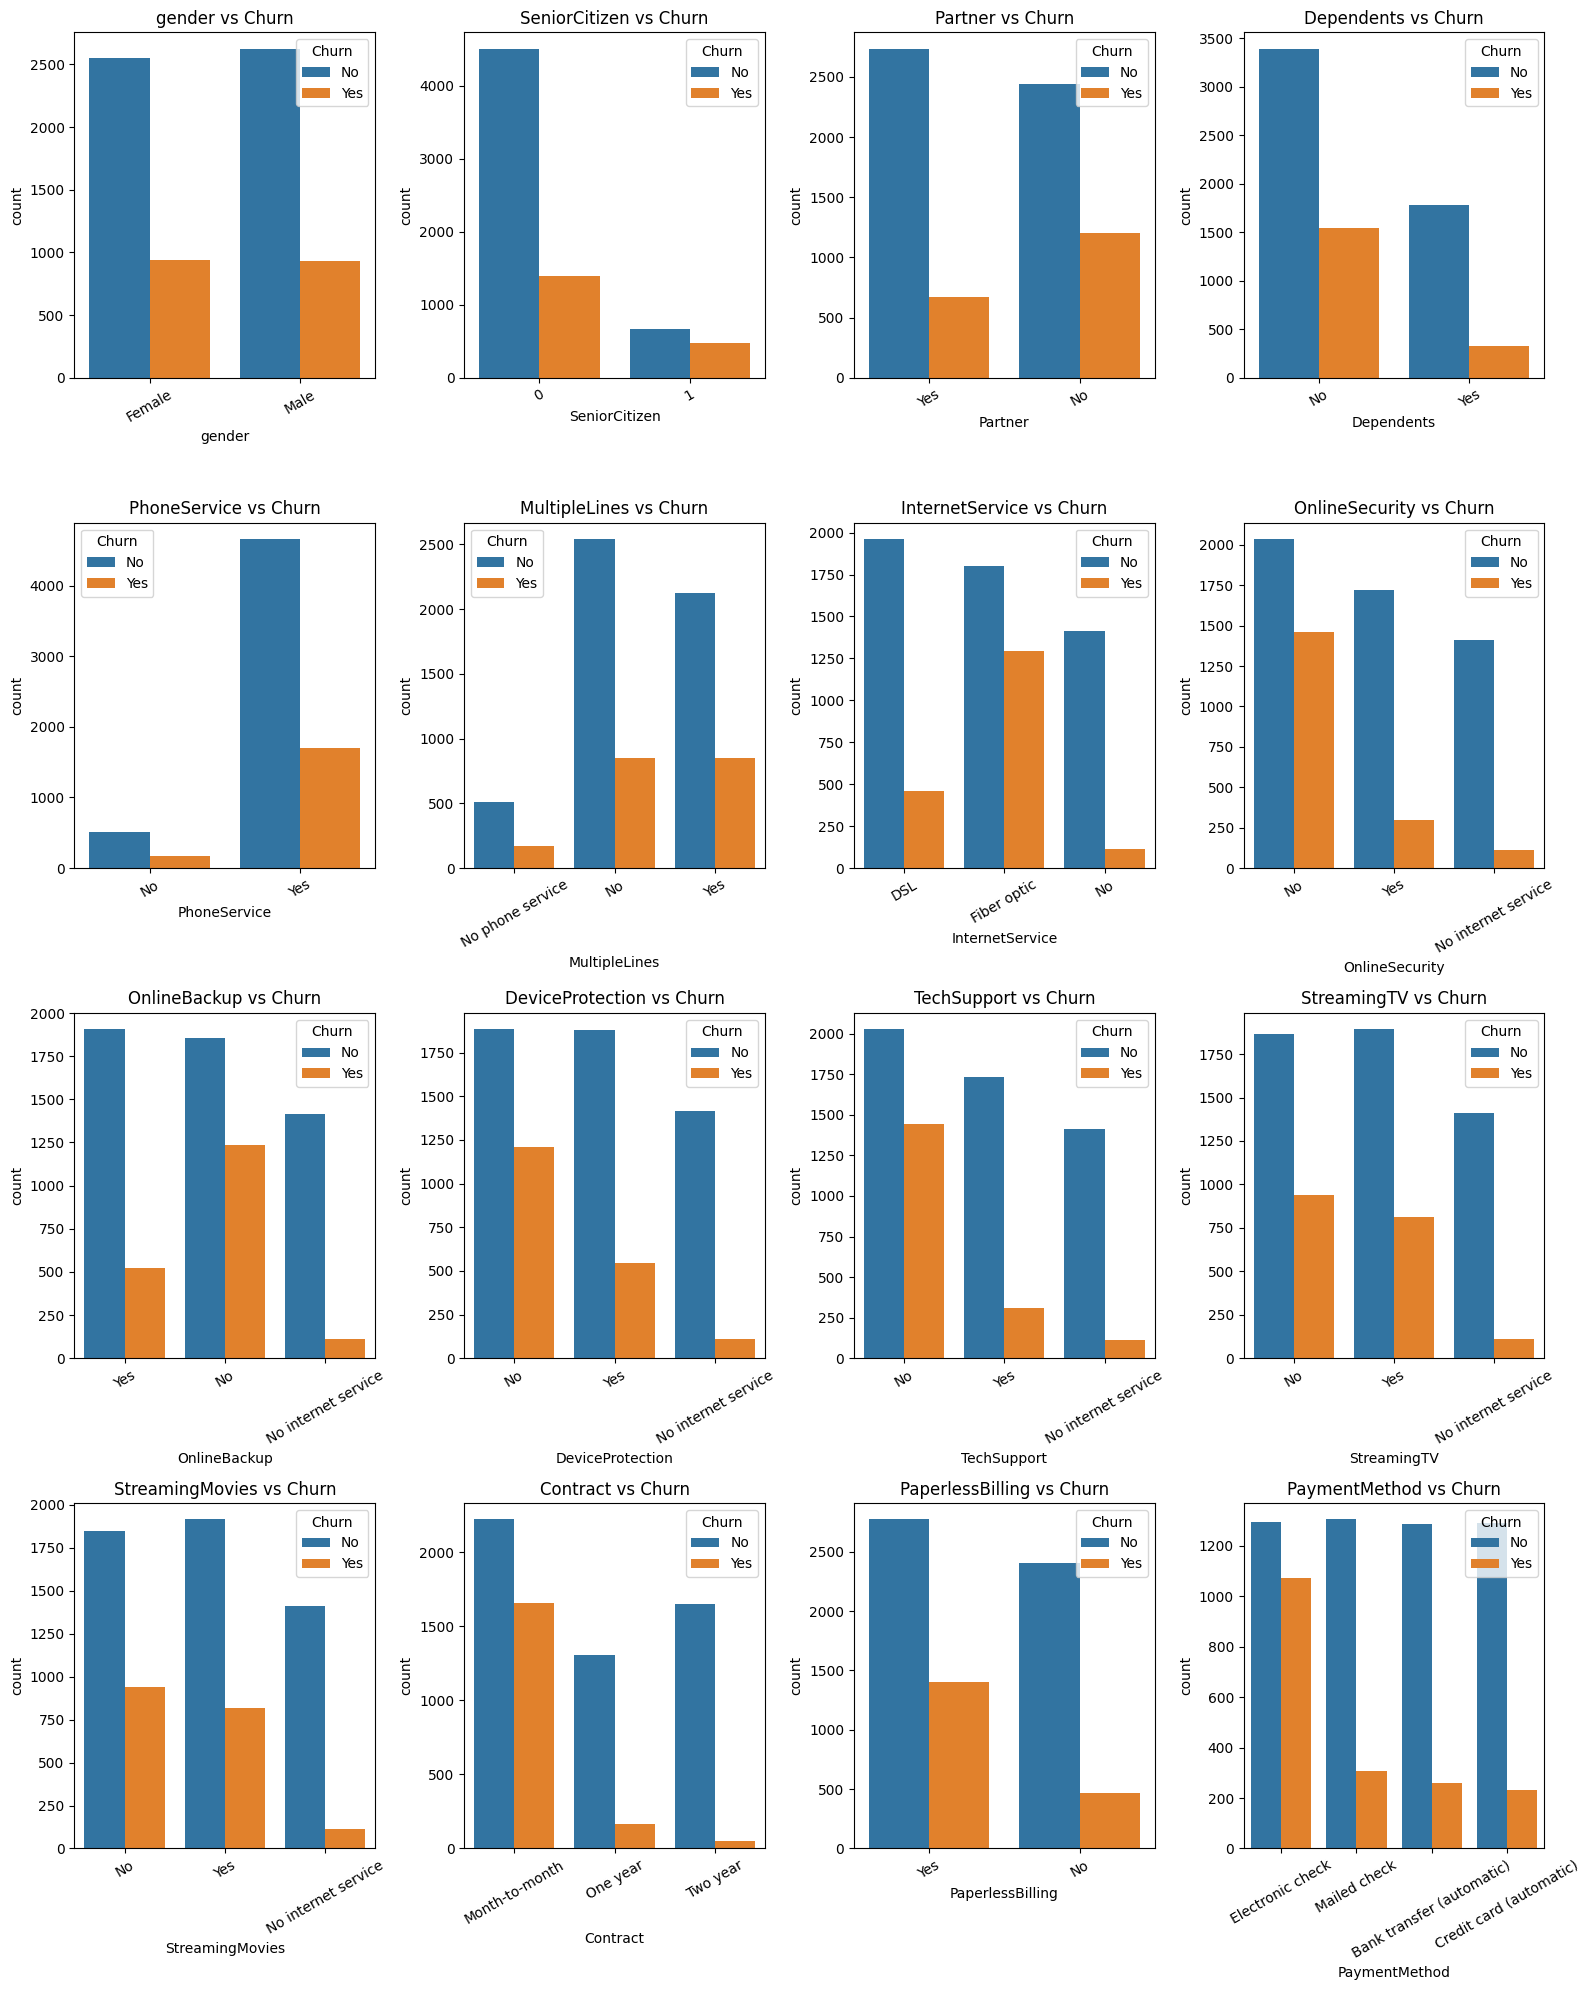

In [44]:
categorical_features = [col for col in df.columns if col not in ['Churn', 'customerID','MonthlyCharges','TotalCharges','tenure']]

plt.figure(figsize=(16,20))

for i, col in enumerate(categorical_features):
    plt.subplot(4,4, i+1)
    sns.countplot(x=col, hue= 'Churn', data = df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation = 30)
    plt.tight_layout()
    
plt.show()

- grid of boxplots to view the distribution with median, quartiles, and outliers.

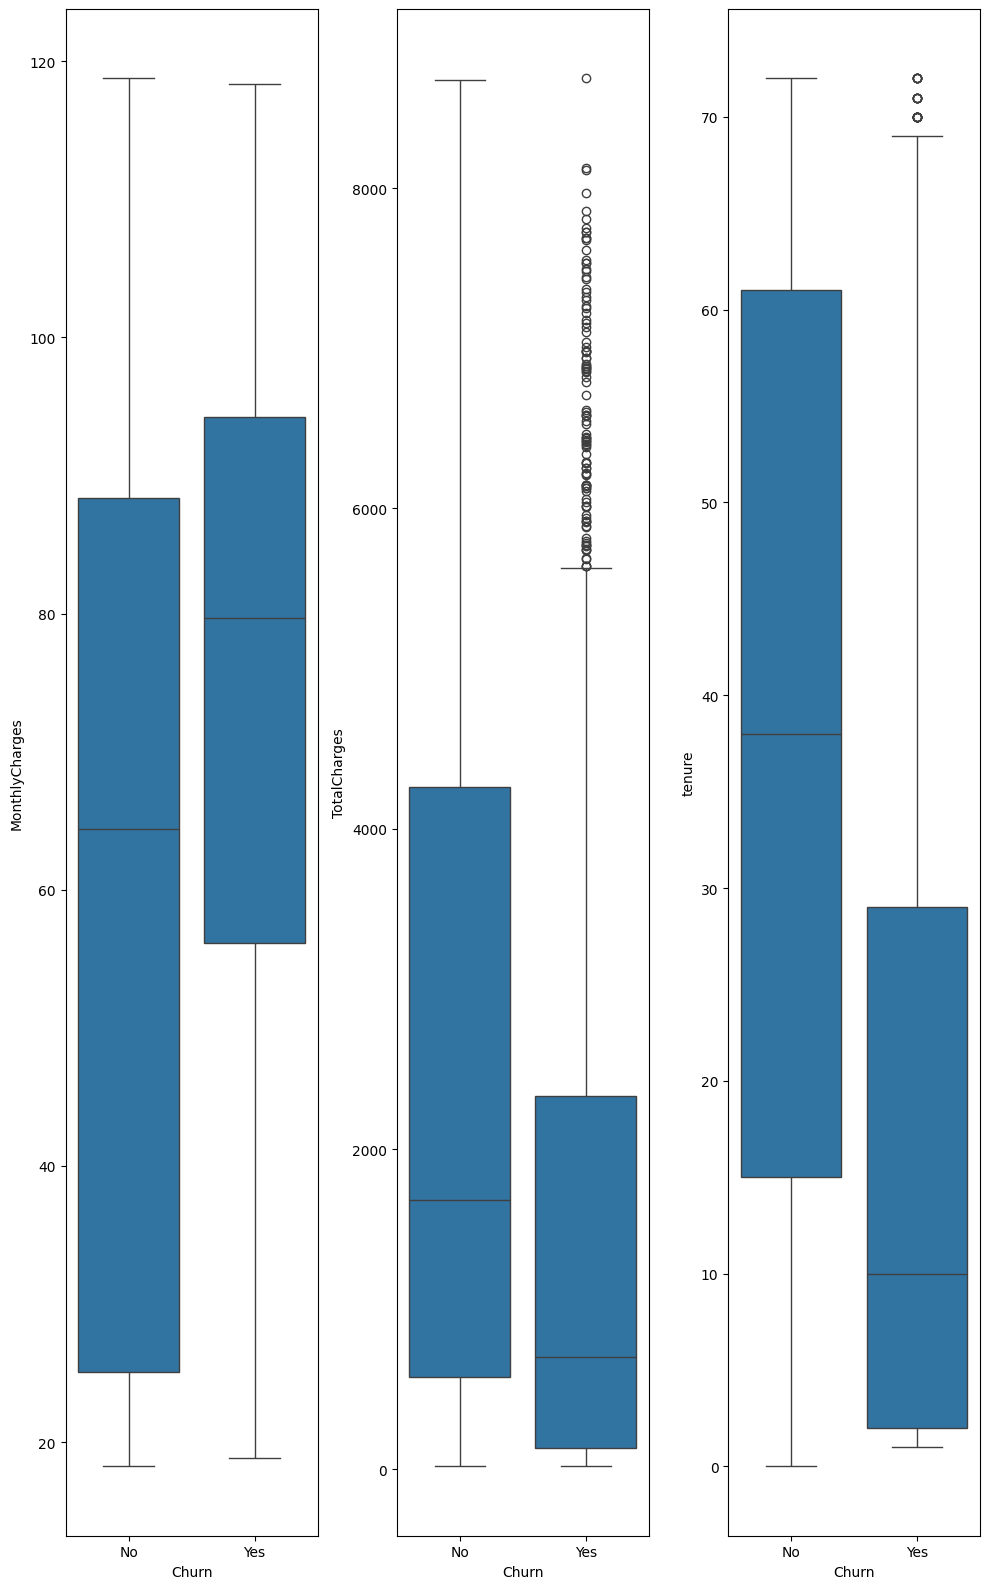

In [45]:
num_features=['MonthlyCharges','TotalCharges','tenure']
plt.figure(figsize=(10,16))
for i, col in enumerate(num_features):
    plt.subplot( 1,3, i+1)
    sns.boxplot(x='Churn', y=col, data = df)
    plt.tight_layout()
    
plt.show()


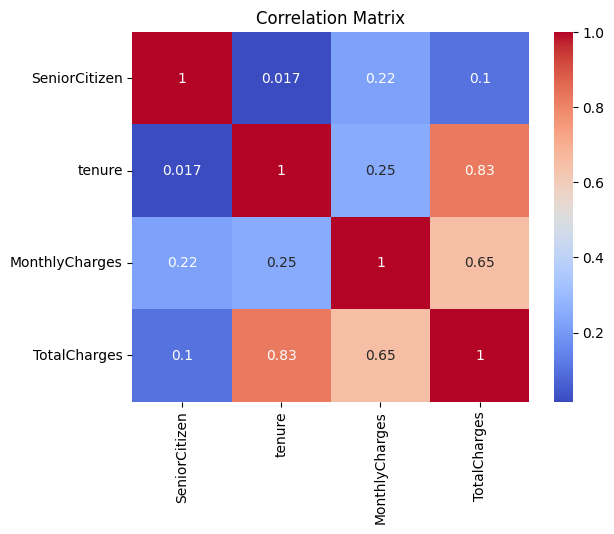

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
label_encoders = {}

yesno_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling'
]

for col in yesno_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df[yesno_cols].head()

    

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,0,0
4,0,0,1,1


In [48]:
categorical_features = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [49]:

df = pd.get_dummies(df, columns= categorical_features, drop_first=True)

print(df.head())

   customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  7590-VHVEG              0        1           0       1             0   
1  5575-GNVDE              0        0           0      34             1   
2  3668-QPYBK              0        0           0       2             1   
3  7795-CFOCW              0        0           0      45             0   
4  9237-HQITU              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges Churn  ...  TechSupport_Yes  \
0                 1           29.85         29.85    No  ...            False   
1                 0           56.95       1889.50    No  ...            False   
2                 1           53.85        108.15   Yes  ...            False   
3                 0           42.30       1840.75    No  ...             True   
4                 1           70.70        151.65   Yes  ...            False   

   StreamingTV_No internet service  StreamingTV_Yes  \
0      

In [50]:
x = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [51]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,True,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,False,False,...,False,False,False,False,False,False,False,False,True,False


In [52]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size= 0.3, random_state=0)

In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Logistic Regression Accuracy: 0.802
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1560
         Yes       0.65      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



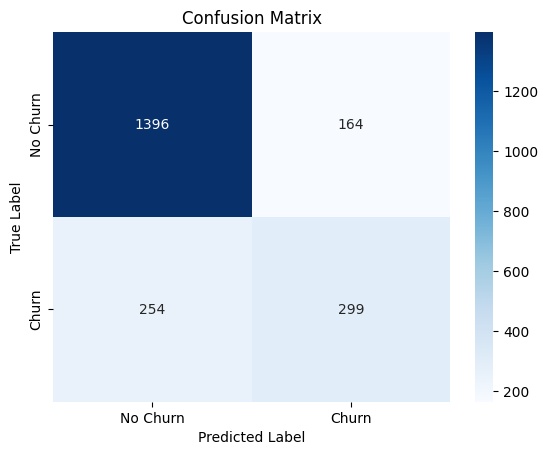

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Logistic Regression Accuracy: {accuracy:.3f}')
print(classification_report(y_test,y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

The model 
- performs well on the 'No' class but struggles to predict churners.
- while predicting churners - has a higher precision score as compared to recall value which means the model only raises alarms when it's sure but misses many churners.

# Final Report

Insights from visualizations:
- customers with month-to-month contracts are more likely to cancel their subscriptions than those with annual contracts
    -- offering discounts for annual contracts may increase customer retention

- customers with services like online security, tech support, device protection are less likely to churn
    -- offering these services may increase customer retention

- paperless billing in customers also results in higher churn rates

- customers that use fiber optic internet are more likely to churn than those with DSL or no internet
    -- fiber user service quality must be investigated

- difference in gender shows no real effect on the customer churn

- it must also be noted that customers who opt for electronic check as their payment method have a pretty high churn rate

 
## Recommendations

- Retention efforts must be focused on :
    -- customers with month-to month contracts 
    -- customers without online security, tech support, device protection

- Offering discounts for annual plans along wth long-term bundle contracts with services mentioned above may increase customer retention

